In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data=pd.read_csv("/content/titanic-passengers.csv",sep=";")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [88]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [53]:
titanic_df_clean_age =  data['Age'].fillna(data['Age'].median(),inplace=True)
data.drop(['Cabin'], axis=1, inplace=True)


In [54]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [92]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])

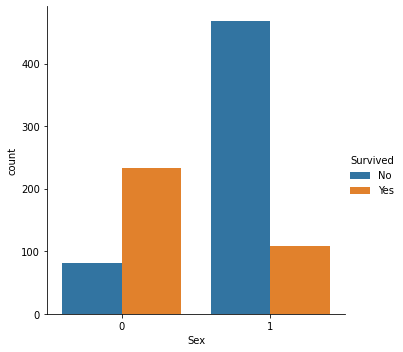

In [56]:
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = data)

In [57]:
data['Survived'] = data['Survived'].apply(lambda x:0 if x.strip()=='No' else 1)   # what is x.strip

None


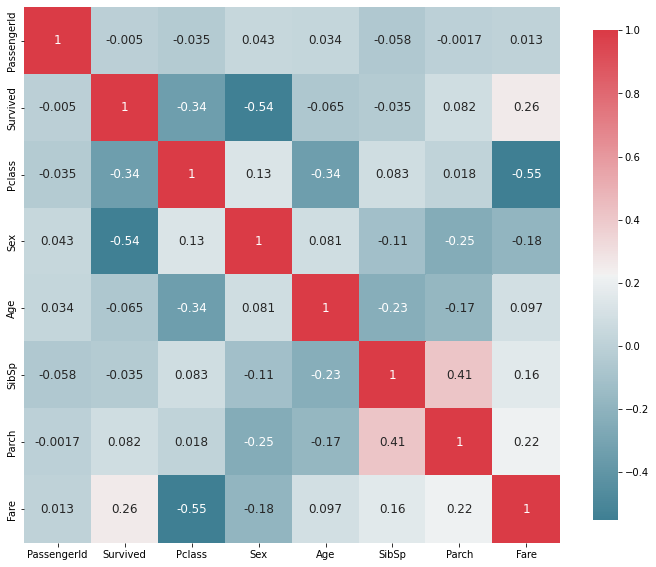

In [58]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
print(plot_correlation_map(data))

if we looked over here we will notice the connection between each cell in this matrix and its variables :) 

for Example : 

there is a strongly correlation between "siblings / spouses aboard the Titanic" and "parents / children aboard the Titanic".

in the otherhand :

 there is a negativaly correlation between "Ticket class" and "Passenger Fare" .


In [59]:
data[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


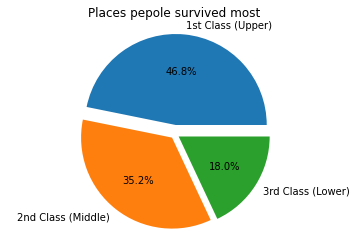

In [60]:
labels = ["1st Class (Upper)","2nd Class (Middle)","3rd Class (Lower) "]
AVGS = [0.629630,0.472826,0.242363]

plt.pie (AVGS,labels=labels,explode=(0.1,0.05,0.05),autopct='%1.1f%%')
plt.title("Places pepole survived most")
plt.axis('equal')
plt.show()

as we noticed over here :

***1st Class*** = Upper part of the ship

the AVG of the pepole survived is **(0.629630)**


***2nd Class*** = Middle part of the ship

the AVG of the pepole survived is **(0.472826)**

***3rd Class*** = Lower part of the ship

the AVG of the pepole survived is **(0.242363)**



In [61]:
survived_by_sex = data.groupby("Sex")['Survived'].mean()
survived_by_sex

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64

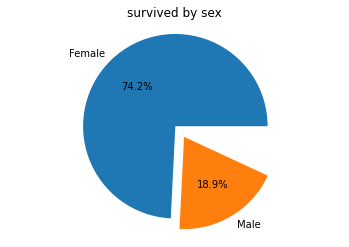

In [62]:
labels = ["Female","Male"]
AVGS = [0.742038,0.188908]

plt.pie (AVGS,labels=labels,explode=(0.1,0.05),autopct='%1.1f%%')
plt.title("survived by sex")
plt.axis('equal')
plt.show()

In [63]:
data['min_Title'] = data['Name'].apply(lambda x : x.split(',')[-1].strip())
data['Title'] = data['min_Title'].apply(lambda x : x.split('.')[0].strip())
data.drop(['min_Title'],axis=1,inplace=True)

In [64]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,S,Mr


In [65]:
data.drop(['Name','PassengerId'], axis=1, inplace=True)
data.drop(['Ticket'], axis=1, inplace=True)

In [66]:
#Visualize the correlation between Title and other features(e.g Sex, Fare, Age).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


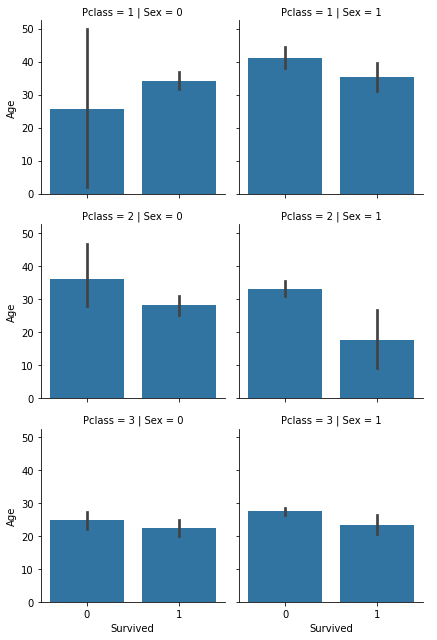

In [67]:
g = sns.FacetGrid(data, col="Sex",row = "Pclass")
g= g.map(sns.barplot,"Survived","Age")
g.add_legend()

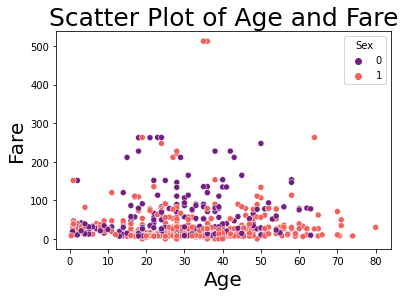

In [68]:
sns.scatterplot(x = "Age", y = "Fare", data = data, hue = "Sex", palette = "magma",sizes = (50, 300))
 
plt.title("Scatter Plot of Age and Fare", fontsize = 25) 
plt.xlabel("Age", fontsize = 20) 
plt.ylabel("Fare", fontsize = 20)
plt.savefig("Scatter Plot of Age and Fare") 
plt.show() 

In [69]:
Title_Dictionary = {

    "Capt":       "Officer",

    "Col":        "Officer",

    "Major":      "Officer",

    "Dr":         "Officer",

    "Rev":        "Officer",

    "Jonkheer":   "Royalty",

    "Don":        "Royalty",

    "Sir" :       "Royalty",

    "Lady" :      "Royalty",

    "the Countess": "Royalty",

    "Dona":       "Royalty",

    "Mme":        "Miss",

    "Mlle":       "Miss",

    "Miss" :      "Miss",

    "Ms":         "Mrs",

    "Mr" :        "Mrs",

    "Mrs" :       "Mrs",

    "Master" :    "Master"

                    }

In [70]:
output = data
data = data.append(Title_Dictionary,ignore_index=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Capt,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0.0,2.0,1.0,28.0,0.0,0.0,13.0000,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,3.0,1.0,25.0,0.0,0.0,7.6500,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,3.0,1.0,20.0,0.0,0.0,7.8542,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3.0,0.0,29.0,0.0,4.0,21.0750,S,Mrs,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,31.0,1.0,0.0,52.0000,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data['New_Title']=data["Title"].map(Title_Dictionary)

In [72]:
data.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Capt,...,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,New_Title
0,0.0,2.0,1.0,28.0,0.0,0.0,13.0000,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs
1,0.0,3.0,1.0,25.0,0.0,0.0,7.6500,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs
2,0.0,3.0,1.0,20.0,0.0,0.0,7.8542,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs
3,0.0,3.0,0.0,29.0,0.0,4.0,21.0750,S,Mrs,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs
4,0.0,1.0,1.0,31.0,1.0,0.0,52.0000,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs
5,0.0,3.0,1.0,37.0,2.0,0.0,7.9250,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs
6,0.0,3.0,1.0,19.0,0.0,0.0,14.5000,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs
7,1.0,3.0,0.0,1.0,0.0,2.0,15.7417,C,Miss,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miss
8,0.0,3.0,1.0,20.5,0.0,0.0,7.2500,S,Mr,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs
9,1.0,2.0,0.0,42.0,1.0,0.0,26.0000,S,Mrs,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs


In [73]:
data['New_Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: New_Title, dtype: int64

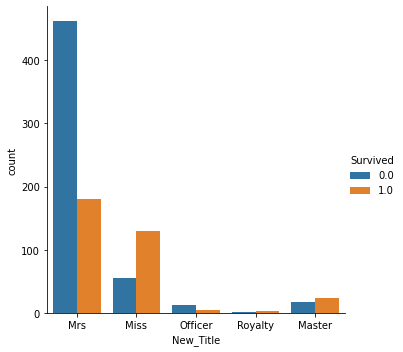

In [74]:
sns.catplot(x ="New_Title", hue ="Survived",kind ="count", data = data)

In [90]:
data['FamilySize'] = data['SibSp'] + data['Parch'] +1

In [83]:
x= data[["Pclass", "Sex"	,"SibSp"	,"Parch","Fare","FamilySize","Survived"]].dropna

In [84]:
x

<bound method DataFrame.dropna of      Pclass  Sex  SibSp  Parch     Fare  FamilySize  Survived
0       2.0  1.0    0.0    0.0  13.0000         1.0       0.0
1       3.0  1.0    0.0    0.0   7.6500         1.0       0.0
2       3.0  1.0    0.0    0.0   7.8542         1.0       0.0
3       3.0  0.0    0.0    4.0  21.0750         5.0       0.0
4       1.0  1.0    1.0    0.0  52.0000         2.0       0.0
..      ...  ...    ...    ...      ...         ...       ...
887     3.0  1.0    0.0    0.0   7.2292         1.0       0.0
888     3.0  0.0    0.0    0.0   8.6625         1.0       0.0
889     3.0  1.0    0.0    0.0   7.8958         1.0       0.0
890     2.0  0.0    0.0    0.0  26.0000         1.0       1.0
891     NaN  NaN    NaN    NaN      NaN         NaN       NaN

[892 rows x 7 columns]>

In [93]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[["Pclass", "Sex"	,"SibSp"	,"Parch","Fare","FamilySize"]]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.84


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


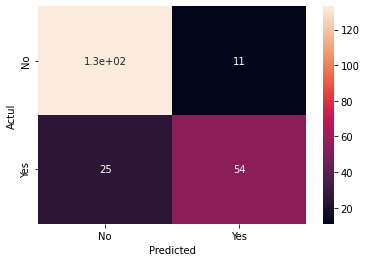

In [94]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actul'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88       144
         Yes       0.83      0.68      0.75        79

    accuracy                           0.84       223
   macro avg       0.84      0.80      0.82       223
weighted avg       0.84      0.84      0.83       223



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


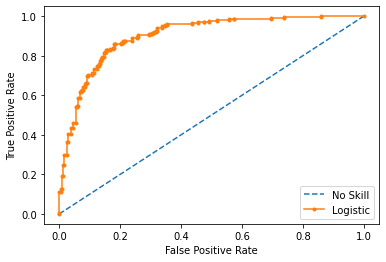

In [100]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()